<a href="https://colab.research.google.com/github/daniyalaamir110/ML_course/blob/main/Projects/2_logistic_regression_analysis_for_breast_cancer_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression Analysis for Breast Cancer Detection

## Overview

In this notebook, we will conduct a logistic regression analysis to detect breast cancer using a dataset that includes various features related to cell characteristics. The primary objective is to build a model capable of distinguishing between benign and malignant cases based on these features.

## Dataset

We'll be working with the "Breast Cancer Dataset," which is accessible on Kaggle. This dataset comprises features such as Clump Thickness, Uniformity of Cell Size, Uniformity of Cell Shape, Marginal Adhesion, Single Epithelial Cell Size, Bare Nuclei, Bland Chromatin, Normal Nucleoli, and Mitoses. The target variable, "Class," is binary, with 2 representing benign and 4 representing malignant cases.

Dataset Link: [Breast Cancer Dataset on Kaggle](https://www.kaggle.com/datasets/marshuu/breast-cancer)

## Sections

1. **Initial Setup:** Load the dataset and necessary libraries to kickstart the analysis.

2. **Data Exploration:** Dive into the characteristics of the dataset, visualize feature distributions, and explore relationships between different variables.

3. **Model Training:** Implement logistic regression to train a model capable of classifying breast cancer cases. Explore convergence and adjust hyperparameters if needed.

4. **Model Evaluation:** Assess the model's performance using various evaluation metrics. Analyze its ability to correctly predict benign and malignant cases.

5. **Conclusion:** Summarize the key findings, discuss the effectiveness of logistic regression for breast cancer detection, and suggest potential areas for further investigation.

# Initial Setup

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import joblib
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

## Loading the Dataset

Before we start our analysis, make sure you have downloaded the dataset and uploaded it to this Colab notebook. You can find the "Breast Cancer Dataset" on Kaggle: [Breast Cancer Dataset on Kaggle](https://www.kaggle.com/datasets/marshuu/breast-cancer)

Once you have uploaded the dataset, we can proceed to load it into our notebook using the following code:

```df = pd.read_csv("path/to/your/uploaded/file.csv")```

In [2]:
df = pd.read_csv("/content/breast_cancer.csv")

# Transform the Class as 0s and 1s
df["Class"] = df["Class"].map({2: 0, 4: 1})

df

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...
678,3,1,1,1,3,2,1,1,1,0
679,2,1,1,1,2,1,1,1,1,0
680,5,10,10,3,7,3,8,10,2,1
681,4,8,6,4,3,4,10,6,1,1


# Data Exploration

## Correlation Heatmap

To better understand the relationships between features, I utilized a correlation heatmap. The heatmap revealed that the Uniformity of cell shape and size had a high correlation which would give rise to the problem of multicolliniarity.


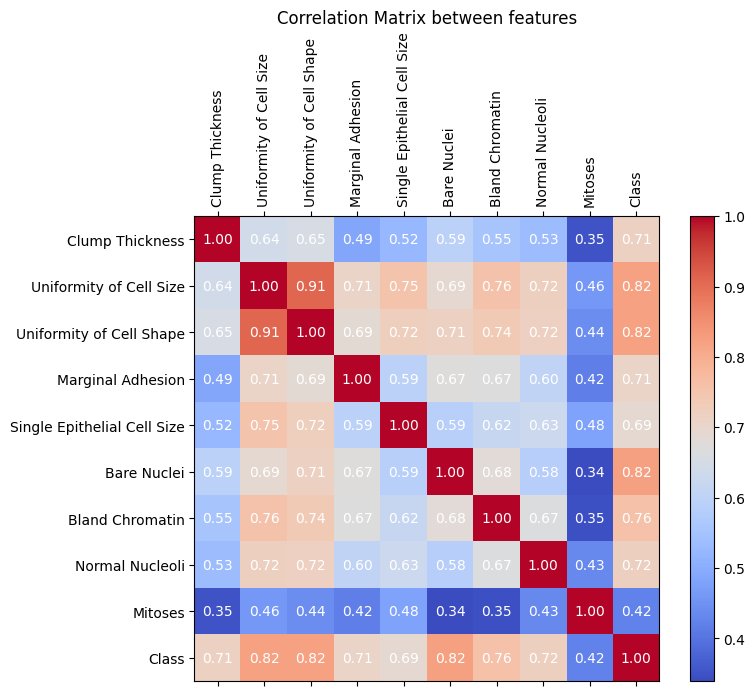

In [3]:
def plot_corr(df):
  plt.figure(figsize=(8, 6))
  corr = df.corr()
  plt.matshow(corr, cmap="coolwarm", fignum=1)
  plt.xticks(range(len(df.columns)), df.columns, rotation=90)
  plt.yticks(range(len(df.columns)), df.columns)
  for i in range(len(df.columns)):
    for j in range(len(df.columns)):
        text = "{:.2f}".format(corr.iloc[i, j])
        plt.text(j, i, text, ha="center", va="center", c="w")
  plt.title("Correlation Matrix between features")
  plt.colorbar()
  plt.show()

plot_corr(df)

Hence, one of the features was dropped – "Uniformity of Cell Shape", as it had slighly greater correlation with other features but same correlation with Class.

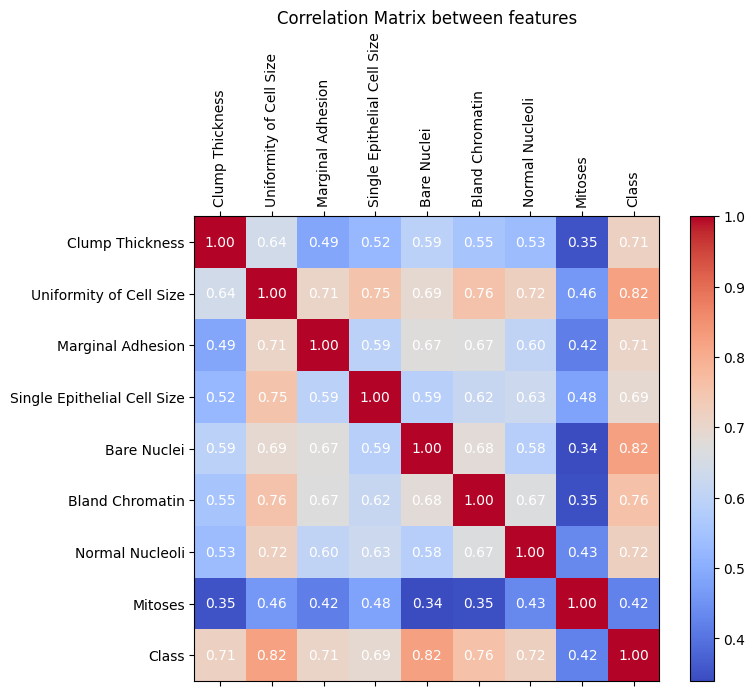

In [4]:
df_selected = df.drop(["Uniformity of Cell Shape"], axis=1)
plot_corr(df_selected)

## Feature Analysis

To gain insights into the distribution and characteristics of each feature, I computed various statistical measures including mean, median, quartiles, standard deviation, minimum, and maximum values.


In [5]:
df_selected.describe().T

,count,mean,std,min,25%,50%,75%,max
Clump Thickness,683.0,4.442167,2.820761,1.0,2.0,4.0,6.0,10.0
Uniformity of Cell Size,683.0,3.150805,3.065145,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,683.0,2.830161,2.864562,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,683.0,3.234261,2.223085,1.0,2.0,2.0,4.0,10.0
Bare Nuclei,683.0,3.544656,3.643857,1.0,1.0,1.0,6.0,10.0
Bland Chromatin,683.0,3.445095,2.449697,1.0,2.0,3.0,5.0,10.0
Normal Nucleoli,683.0,2.869693,3.052666,1.0,1.0,1.0,4.0,10.0
Mitoses,683.0,1.603221,1.732674,1.0,1.0,1.0,1.0,10.0
Class,683.0,0.349927,0.477296,0.0,0.0,0.0,1.0,1.0


It turns out that there is not need to scale our features as the ranges of each of them are quite similar

# Model Training

## Data Splitting

Before training our linear regression model, we need to split our dataset into training and testing sets. This allows us to evaluate the model's performance on unseen data.


In [6]:
X = df_selected.drop("Class", axis=1)
y = df_selected["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Generation
Let's proceed with generating our logistic regression model using the training data.

In [7]:
lr = LogisticRegression(penalty="l2")
lr = lr.fit(X_train, y_train)

## Interpretation of Parameters
Now, let's interpret the parameters (coefficients) of our logistic regression model. The coefficients represent the impact of each feature on the target variable.

In [8]:
print("Intercept =", lr.intercept_[0])
print("Weights:\n")

coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': lr.coef_.flatten()})
coefficients

Intercept = -9.633826630474996
Weights:



,Feature,Coefficient
0,Clump Thickness,0.498133
1,Uniformity of Cell Size,0.216089
2,Marginal Adhesion,0.294104
3,Single Epithelial Cell Size,0.083698
4,Bare Nuclei,0.382365
5,Bland Chromatin,0.484441
6,Normal Nucleoli,0.221473
7,Mitoses,0.396671


# Model Evaluation

## Model Accuracy

Let's start by evaluating the accuracy of our logistic regression model on the training and testing set.


In [9]:
train_score = lr.score(X_train, y_train)
test_score = lr.score(X_test, y_test)

print("Accuracy with Training data =", train_score)
print("Accuracy with Testing data =", test_score)

Accuracy with Training data = 0.9725274725274725
Accuracy with Testing data = 0.9635036496350365


It turns out that model accuracy is above 95% on both sets.

## Confusion Matrix

A confusion matrix is a powerful tool for evaluating the performance of a classification model, such as logistic regression. It provides a clear overview of the model's predictions against the actual outcomes. The matrix is organized into four quadrants:

|               | Actual Benign (0) | Actual Malignant (1) |
| ------------- | -------------------- | ------------------------ |
| Predict Benign (0) | True Negative (TN)   | False Negative (FN)      |
| Predict Malignant (1) | False Positive (FP)  | True Positive (TP)       |

**Definitions:**
- **True Positive (TP):** Instances correctly predicted as malignant.
- **True Negative (TN):** Instances correctly predicted as benign.
- **False Positive (FP):** Instances predicted as malignant but are actually benign.
- **False Negative (FN):** Instances predicted as benign but are actually malignant.


In [10]:
def show_confusion_matrix(X, y, lr, title="Confusion Matrix"):
  y_pred = lr.predict(X)
  m = len(X)
  cm = confusion_matrix(y, y_pred)
  columns = ['Actual 1', 'Actual 0']
  rows = ['Predict 1', 'Predict 0']
  cm_matrix = pd.DataFrame(data=cm, columns=columns, index=rows)
  plt.matshow(cm_matrix, cmap="Dark2", fignum=1)
  plt.xticks(range(len(columns)), columns, rotation=0)
  plt.yticks(range(len(rows)), rows)
  for i in range(len(rows)):
    for j in range(len(columns)):
        text = "{} ({:.1f}%)".format(cm_matrix.iloc[i, j], cm_matrix.iloc[i, j] * 100 / m)
        plt.text(j, i, text, ha="center", va="center", c="w")
  plt.title(title)
  plt.show()

### Confusion Matrix With Training Data

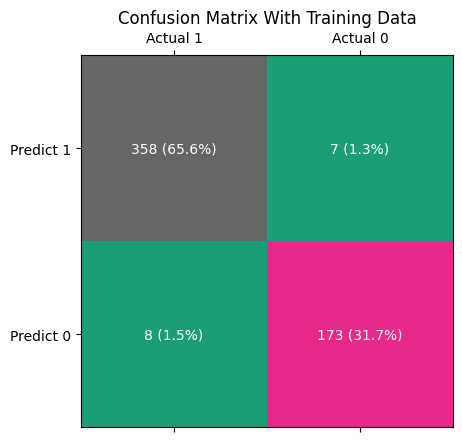

In [11]:
show_confusion_matrix(X_train, y_train, lr, title="Confusion Matrix With Training Data")

### Confusion Matrix With Test Data

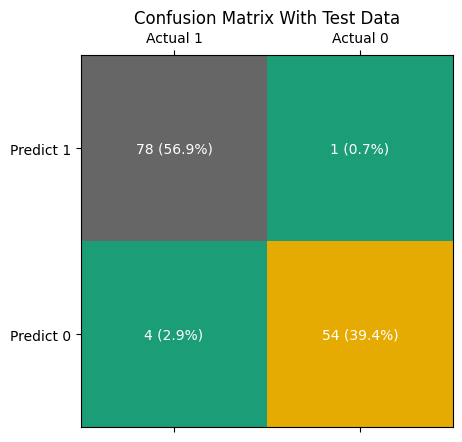

In [12]:
show_confusion_matrix(X_test, y_test, lr, title="Confusion Matrix With Test Data")

## Predictions on Random Data
To gain a deeper understanding of how our model performs on new, random data, let's detect the presence of breast cancer using our model.

In [13]:
def predict(X, X_features):
  predictions = lr.predict(pd.DataFrame(X, columns=X_features))
  return predictions

In [14]:
X_pred = np.array([
    [5, 1, 4, 2, 9, 3, 9, 7],
    [1, 5, 3, 1, 9, 8, 2, 1],
    [6, 6, 2, 2, 1, 1, 5, 3],
    [2, 1, 7, 3, 5, 3, 7, 2],
    [4, 2, 9, 6, 7, 8, 2, 5],
    [10, 9, 0, 9, 2, 1, 9, 2],
    [8, 8, 2, 7, 1, 3, 1, 1],
], X.columns)

y_pred = predict(X_pred, X.columns)

df_pred = pd.DataFrame(X_pred, columns=X.columns)
df_pred["Class"] = y_pred

df_pred

,Clump Thickness,Uniformity of Cell Size,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,4,2,9,3,9,7,1
1,1,5,3,1,9,8,2,1,1
2,6,6,2,2,1,1,5,3,0
3,2,1,7,3,5,3,7,2,0
4,4,2,9,6,7,8,2,5,1
5,10,9,0,9,2,1,9,2,1
6,8,8,2,7,1,3,1,1,0


## Conclusion

In this analysis, we successfully applied logistic regression to detect breast cancer with an accuracy exceeding 95%. The model demonstrated commendable performance in distinguishing between benign and malignant cases. However, there are avenues for improvement:

- **Feature Selection:** Enhance the model by carefully selecting relevant features. Consider employing techniques like Recursive Feature Elimination or feature importance analysis.

- **Domain Knowledge:** Leverage domain expertise to better understand the impact of features on breast cancer detection. This can guide more informed decisions in feature engineering and selection.

- **Regularization:** Apply regularization techniques, such as L1 or L2 regularization, to control the impact of high-correlation features and prevent overfitting.

These enhancements, coupled with a deeper exploration of domain-specific insights, have the potential to further refine the model's accuracy and robustness in breast cancer detection.
